# الگوریتم‌های ژنتیک

این دفترچه بخشی از [برنامه آموزشی هوش مصنوعی برای مبتدیان](http://github.com/microsoft/ai-for-beginners) است.


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## مقداری نظریه

**الگوریتم‌های ژنتیکی** (GA) بر اساس **رویکرد تکاملی** در هوش مصنوعی هستند، که در آن از روش‌های تکامل جمعیت برای یافتن یک راه‌حل بهینه برای یک مسئله مشخص استفاده می‌شود. این الگوریتم‌ها در سال ۱۹۷۵ توسط [جان هنری هلند](https://en.wikipedia.org/wiki/John_Henry_Holland) پیشنهاد شدند.

الگوریتم‌های ژنتیکی بر اساس ایده‌های زیر بنا شده‌اند:
* راه‌حل‌های معتبر برای مسئله می‌توانند به صورت **ژن‌ها** نمایش داده شوند.
* **ترکیب** به ما اجازه می‌دهد دو راه‌حل را با هم ترکیب کنیم تا یک راه‌حل جدید و معتبر به دست آوریم.
* **انتخاب** برای گزینش راه‌حل‌های بهینه‌تر با استفاده از یک **تابع تناسب** به کار می‌رود.
* **جهش‌ها** برای بی‌ثبات کردن بهینه‌سازی و خروج از حداقل محلی معرفی می‌شوند.

اگر بخواهید یک الگوریتم ژنتیکی را پیاده‌سازی کنید، به موارد زیر نیاز دارید:

* یافتن روشی برای کدگذاری راه‌حل‌های مسئله با استفاده از **ژن‌ها** $g\in\Gamma$
* تعریف **تابع تناسب** $\mathrm{fit}: \Gamma\to\mathbb{R}$ روی مجموعه ژن‌ها $\Gamma$. مقادیر کوچکتر تابع نشان‌دهنده راه‌حل‌های بهتر هستند.
* تعریف مکانیزم **ترکیب** برای ترکیب دو ژن و به دست آوردن یک راه‌حل معتبر جدید $\mathrm{crossover}: \Gamma^2\to\Gamma$.
* تعریف مکانیزم **جهش** $\mathrm{mutate}: \Gamma\to\Gamma$.
در بسیاری از موارد، ترکیب و جهش الگوریتم‌های ساده‌ای هستند که ژن‌ها را به عنوان دنباله‌های عددی یا بردارهای بیتی دستکاری می‌کنند.

پیاده‌سازی خاص یک الگوریتم ژنتیکی ممکن است از موردی به مورد دیگر متفاوت باشد، اما ساختار کلی به صورت زیر است:

1. انتخاب جمعیت اولیه $G\subset\Gamma$
2. به صورت تصادفی یکی از عملیات‌هایی که در این مرحله انجام خواهد شد را انتخاب کنید: ترکیب یا جهش
3. **ترکیب**:
   * به صورت تصادفی دو ژن $g_1, g_2 \in G$ را انتخاب کنید.
   * ترکیب را محاسبه کنید $g=\mathrm{crossover}(g_1,g_2)$
   * اگر $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ یا $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - ژن مربوطه در جمعیت را با $g$ جایگزین کنید.
4. **جهش** - یک ژن تصادفی $g\in G$ را انتخاب کنید و آن را با $\mathrm{mutate}(g)$ جایگزین کنید.
5. از مرحله ۲ تکرار کنید، تا زمانی که مقدار $\mathrm{fit}$ به اندازه کافی کوچک شود یا محدودیت تعداد مراحل به پایان برسد.

وظایفی که معمولاً توسط الگوریتم‌های ژنتیکی حل می‌شوند:
1. بهینه‌سازی زمان‌بندی
1. بسته‌بندی بهینه
1. برش بهینه
1. تسریع جستجوی جامع


## مشکل ۱: تقسیم عادلانه گنج

**وظیفه**:  
دو نفر گنجی پیدا کرده‌اند که شامل الماس‌هایی با اندازه‌های مختلف (و به تبع آن، قیمت‌های مختلف) است. آن‌ها باید گنج را به دو بخش تقسیم کنند به‌گونه‌ای که تفاوت قیمت بین دو بخش برابر با صفر (یا حداقل ممکن) باشد.

**تعریف رسمی**:  
ما مجموعه‌ای از اعداد $S$ داریم. باید آن را به دو زیرمجموعه $S_1$ و $S_2$ تقسیم کنیم، به‌طوری که:  
$$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$  
و $S_1\cup S_2=S$، $S_1\cap S_2=\emptyset$.

ابتدا، مجموعه $S$ را تعریف کنیم:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

بیایید هر راه‌حل ممکن مسئله را با یک بردار باینری $B\in\{0,1\}^N$ کدگذاری کنیم، که عدد در موقعیت $i$-ام نشان می‌دهد که عدد $i$-ام در مجموعه اصلی $S$ به کدام یک از مجموعه‌ها ($S_1$ یا $S_2$) تعلق دارد. تابع `generate` این بردارهای باینری تصادفی را تولید خواهد کرد.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


بیایید اکنون تابع `fit` را تعریف کنیم که "هزینه" راه‌حل را محاسبه می‌کند. این هزینه تفاوت بین مجموع دو مجموعه، $S_1$ و $S_2$ خواهد بود:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

اکنون باید توابعی برای جهش و ترکیب تعریف کنیم:
* برای جهش، یک بیت تصادفی انتخاب می‌کنیم و آن را معکوس می‌کنیم (تغییر از ۰ به ۱ و بالعکس)
* برای ترکیب، تعدادی بیت از یک بردار و تعدادی بیت از بردار دیگر می‌گیریم. از همان تابع `generate` استفاده می‌کنیم تا به صورت تصادفی انتخاب کنیم که کدام بیت‌ها را از کدام یک از ماسک‌های ورودی بگیریم.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

بیایید جمعیت اولیه‌ای از راه‌حل‌ها $P$ با اندازه `pop_size` ایجاد کنیم:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

اکنون، تابع اصلی برای انجام تکامل. `n` تعداد مراحل تکامل است که باید انجام شود. در هر مرحله:
* با احتمال ۳۰٪ یک جهش انجام می‌دهیم و عنصر با بدترین تابع `fit` را با عنصر جهش‌یافته جایگزین می‌کنیم
* با احتمال ۷۰٪ یک ترکیب انجام می‌دهیم

این تابع بهترین راه‌حل (ژن مربوط به بهترین راه‌حل) و تاریخچه کمترین مقدار تابع `fit` در جمعیت در هر تکرار را بازمی‌گرداند.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


شما می‌توانید ببینید که ما توانسته‌ایم تابع `fit` را تا حد زیادی کاهش دهیم! در اینجا نموداری است که نشان می‌دهد چگونه تابع `fit` برای کل جمعیت در طول فرآیند رفتار می‌کند.


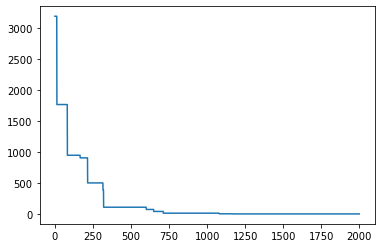

In [10]:
plt.plot(hist)
plt.show()

## مسئله ۲: مسئله وزیرهای N

**وظیفه**:  
شما باید $N$ وزیر را روی یک صفحه شطرنج به ابعاد $N\times N$ قرار دهید به‌گونه‌ای که هیچ‌کدام از آن‌ها به یکدیگر حمله نکنند.

ابتدا، بیایید این مسئله را بدون استفاده از الگوریتم‌های ژنتیک و با استفاده از جستجوی کامل حل کنیم. می‌توانیم وضعیت صفحه شطرنج را با لیست $L$ نمایش دهیم، به‌طوری‌که عدد $i$-ام در لیست نشان‌دهنده موقعیت افقی وزیر در سطر $i$-ام است. کاملاً واضح است که هر راه‌حل فقط یک وزیر در هر سطر خواهد داشت و هر سطر یک وزیر خواهد داشت.

هدف ما این است که اولین راه‌حل مسئله را پیدا کنیم و سپس جستجو را متوقف کنیم. شما می‌توانید به‌راحتی این تابع را گسترش دهید تا تمام موقعیت‌های ممکن برای وزیرها را تولید کند.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

حالا بیایید اندازه بگیریم که حل مسئله ۲۰ وزیر چقدر زمان می‌برد:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


حالا بیایید همین مسئله را با استفاده از الگوریتم ژنتیک حل کنیم. این راه‌حل از [این پست وبلاگ](https://kushalvyas.github.io/gen_8Q.html) الهام گرفته شده است.

ما هر راه‌حل را با همان لیست به طول $N$ نمایش می‌دهیم، و به عنوان تابع `fit` تعداد وزیرهایی را که به یکدیگر حمله می‌کنند در نظر می‌گیریم:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

از آنجا که محاسبه تابع برازش زمان‌بر است، بیایید هر راه‌حل را در جمعیت همراه با مقدار تابع برازش ذخیره کنیم. بیایید جمعیت اولیه را تولید کنیم:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

اکنون باید توابع جهش و ترکیب را تعریف کنیم. ترکیب، دو ژن را با شکستن آن‌ها در یک نقطه تصادفی و اتصال دو بخش از ژن‌های مختلف به یکدیگر ترکیب می‌کند.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

حالا بیایید حلقه اصلی تکاملی را تعریف کنیم. منطق را کمی متفاوت از مثال قبلی طراحی می‌کنیم تا نشان دهیم که می‌توان خلاقیت به خرج داد. ما تا زمانی که به راه‌حل کامل (تابع تناسب=۰) برسیم، حلقه را ادامه می‌دهیم و در هر مرحله نسل فعلی را می‌گیریم و نسل جدیدی با همان اندازه تولید می‌کنیم. این کار با استفاده از تابع `nxgeneration` و مراحل زیر انجام می‌شود:

1. حذف راه‌حل‌هایی که کمترین تناسب را دارند - تابعی به نام `discard_unfit` این کار را انجام می‌دهد.
1. اضافه کردن چند راه‌حل تصادفی دیگر به نسل.
1. تولید نسل جدید با اندازه `gen_size` با استفاده از مراحل زیر برای هر ژن جدید:
    - انتخاب دو ژن تصادفی، با احتمالی متناسب با تابع تناسب.
    - محاسبه یک ترکیب (crossover).
    - اعمال یک جهش با احتمال `mutation_prob`.


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

جالب است که در بیشتر مواقع ما می‌توانیم راه‌حلی را به سرعت پیدا کنیم، اما در برخی موارد نادر بهینه‌سازی به حداقل محلی می‌رسد و فرآیند برای مدت طولانی متوقف می‌شود. مهم است که این موضوع را هنگام اندازه‌گیری زمان متوسط در نظر بگیرید: در حالی که در بیشتر موارد الگوریتم ژنتیک سریع‌تر از جستجوی کامل خواهد بود، در برخی موارد ممکن است زمان بیشتری ببرد. برای غلبه بر این مشکل، اغلب منطقی است که تعداد نسل‌ها را محدود کنیم و اگر نتوانیم راه‌حل را پیدا کنیم - می‌توانیم از ابتدا شروع کنیم.


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوء تفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
